# Hypothesis Testing with R

**OBJECTIVES**

- Identify scenarios where hypothesis tests can be applied to assess differences between groups
- Use `R` to perform hypothesis tests for proportions and means
- Incorporate predictors for differences between groups using Logistic Regression
- Apply Hypothesis testing to problems from social science and business settings

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



#### Difference in Proportions

Visually assessing the difference in proportions is equivalent to looking at a bar plot.  To test the difference in proportions we use the `prop.test` function.  You can either enter the counts directly of use `xtabs` to create the cross-tabulated data from a DataFrame.  

In [ ]:
clicks <- c(400, 410)         #number of clicks by version
totals <- c(500, 500)         #number of total visits to site

In [ ]:
df <- data.frame(page = c('original', 'new'),
                clicks = c(.8, .82))
df

page,clicks
<chr>,<dbl>
original,0.80
new,0.82


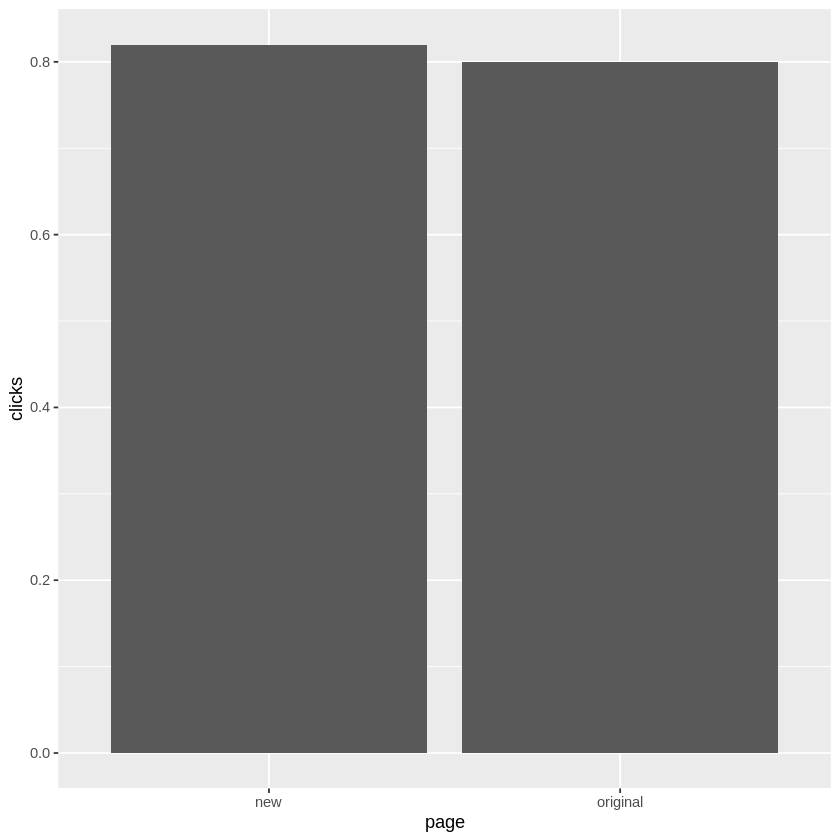

In [ ]:
ggplot(df, aes(x = page, y = clicks)) +
  geom_bar(stat = 'identity')

In [ ]:
clicks <- c(400, 410).        #number of clicks by version
totals <- c(500, 500)         #number of total visits to site
prop.test(clicks, totals).    #test for difference in proportions


	2-sample test for equality of proportions with continuity correction

data:  clicks out of totals
X-squared = 0.52632, df = 1, p-value = 0.4682
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07061343  0.03061343
sample estimates:
prop 1 prop 2 
  0.80   0.82 


In [ ]:
clicks2 <- c(300, 450)        #number of clicks by version
totals <- c(500, 500)         #number of total visits to site
prop.test(clicks2, totals)    #testing the difference


	2-sample test for equality of proportions with continuity correction

data:  clicks2 out of totals
X-squared = 118.41, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.3523524 -0.2476476
sample estimates:
prop 1 prop 2 
   0.6    0.9 


#### Example: Product Recommendations

In [ ]:
#example 2 -- recommended product algorithms
clicks <- c(420, 510)
totals <- c(1000, 1000)
prop.test(clicks, totals)


	2-sample test for equality of proportions with continuity correction

data:  clicks out of totals
X-squared = 15.92, df = 1, p-value = 6.608e-05
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.13454033 -0.04545967
sample estimates:
prop 1 prop 2 
  0.42   0.51 


In [ ]:
group <- c('women', 'men')
clicks <- c(328, 234)
totals <- c(537, 532)
insta <- data.frame(group, clicks, totals)
insta

group,clicks,totals
<chr>,<dbl>,<dbl>
women,328,537
men,234,532


In [ ]:
prop.test(clicks, totals)


	2-sample test for equality of proportions with continuity correction

data:  clicks out of totals
X-squared = 30.641, df = 1, p-value = 3.104e-08
alternative hypothesis: two.sided
95 percent confidence interval:
 0.1100917 0.2318105
sample estimates:
   prop 1    prop 2 
0.6108007 0.4398496 


#### Example 2: Wine Sales Data

Typically, rather than having a total count example we are provided a dataframe that contains the variable of interest alongside additional data on the customer or transaction.

In [ ]:
email_data <- read.csv('https://raw.githubusercontent.com/eleafeit/ab_test/master/code/test_data.csv')
head(email_data)

,user_id,cpgn_id,group,email,open,click,purch,chard,sav_blanc,syrah,cab,past_purch,days_since,visits
,<int>,<chr>,<chr>,<lgl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1000001,1901Email,ctrl,FALSE,0,0,0.00,0.00,0.00,33.94,0.00,33.94,119,11
2,1000002,1901Email,email_B,TRUE,1,0,0.00,0.00,0.00,16.23,76.31,92.54,60,3
3,1000003,1901Email,email_A,TRUE,1,1,200.51,516.39,0.00,16.63,0.00,533.02,9,9
4,1000004,1901Email,email_A,TRUE,1,0,0.00,0.00,0.00,0.00,41.21,41.21,195,6
5,1000005,1901Email,email_A,TRUE,1,1,158.30,426.53,1222.48,0.00,0.00,1649.01,48,9
6,1000006,1901Email,email_B,TRUE,1,0,0.00,0.00,0.00,0.00,0.00,0.00,149,6


In [ ]:
#calculate proportions in each group
email_data %>%                   
  group_by(group) %>% 
  summarise(mean(open))

group,mean(open),mean(click),mean(purch)
<chr>,<dbl>,<dbl>,<dbl>
ctrl,0.0000000,0.00000000,12.42029
email_A,0.7182850,0.13167509,25.62284
email_B,0.6516974,0.09342108,25.86629


In [ ]:
###limit data to only those emailed
emailed <- email_data[email_data$group != 'ctrl',] 

In [ ]:
#use xtabs to cross-tabulate email groups and open
#data with successes as first column and failures as second
xtabs(~group + open, data = emailed)[,2:1] 

         open
group         1     0
  email_A 29686 11643
  email_B 26934 14395

In [ ]:
#run test on proportions
prop.test(xtabs(~group + open, data = emailed)[,2:1]) 


	2-sample test for equality of proportions with continuity correction

data:  xtabs(~group + open, data = emailed)[, 2:1]
X-squared = 424.32, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 0.06024628 0.07292897
sample estimates:
   prop 1    prop 2 
0.7182850 0.6516974 


In [ ]:
#clicks by email
prop.test(xtabs(~group + click, data = emailed)[,2:1])


	2-sample test for equality of proportions with continuity correction

data:  xtabs(~group + click, data = emailed)[, 2:1]
X-squared = 302.38, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 0.03392871 0.04257931
sample estimates:
    prop 1     prop 2 
0.13167509 0.09342108 


#### Differences in Means

Rather than comparing a column of binary variables we may be interested in comparing continuous values in columns.  We can again look at numeric summaries using the `group_by` function and perform a hypothesis test using the `t.test` function.

In [ ]:
emailed %>% 
  group_by(group) %>% 
  summarise(mean(purch))

group,mean(purch)
<chr>,<dbl>
email_A,25.62284
email_B,25.86629


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 51719 rows containing non-finite values (`stat_ydensity()`).”


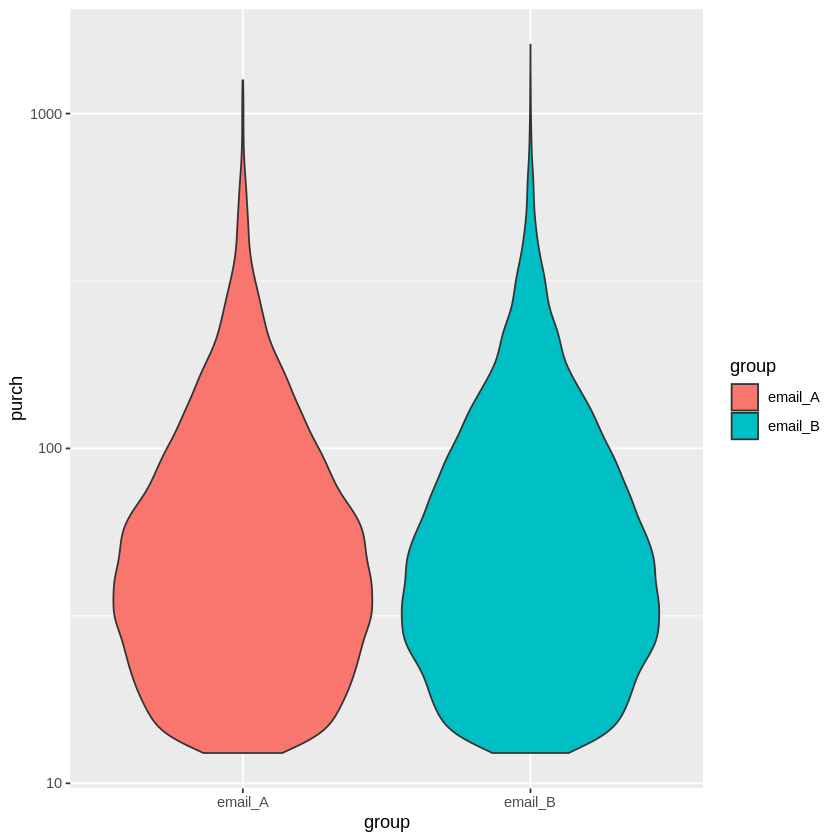

In [ ]:
ggplot(emailed, aes(x = group, y = purch, fill = group)) + 
    geom_violin() + 
    scale_y_log10();

In [ ]:
t.test(purch ~ group, data = emailed)


	Welch Two Sample t-test

data:  purch by group
t = -0.59169, df = 82644, p-value = 0.5541
alternative hypothesis: true difference in means between group email_A and group email_B is not equal to 0
95 percent confidence interval:
 -1.0498820  0.5629813
sample estimates:
mean in group email_A mean in group email_B 
             25.62284              25.86629 


In [ ]:
reading <- read.csv('drp.csv')
head(reading)

,id,group,g,drp
,<int>,<chr>,<int>,<int>
1,1,Treat,0,24
2,2,Treat,0,56
3,3,Treat,0,43
4,4,Treat,0,59
5,5,Treat,0,58
6,6,Treat,0,52


In [ ]:
reading %>%
  group_by(group) %>%
  summarise(mean(drp))

group,mean(drp)
<chr>,<dbl>
Control,41.52174
Treat,51.47619


In [ ]:
t.test(drp ~ group, data = reading)


	Welch Two Sample t-test

data:  drp by group
t = -2.3109, df = 37.855, p-value = 0.02638
alternative hypothesis: true difference in means between group Control and group Treat is not equal to 0
95 percent confidence interval:
 -18.67588  -1.23302
sample estimates:
mean in group Control   mean in group Treat 
             41.52174              51.47619 


#### Subscription Dataset

In [ ]:
adf <- read.csv('http://goo.gl/qw303p')
head(adf)

,age,gender,income,kids,ownHome,subscribe,Segment
,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
1,47.31613,Male,49482.81,2,ownNo,subNo,Suburb mix
2,31.38684,Male,35546.29,1,ownYes,subNo,Suburb mix
3,43.20034,Male,44169.19,0,ownYes,subNo,Suburb mix
4,37.31700,Female,81041.99,1,ownNo,subNo,Suburb mix
5,40.95439,Female,79353.01,3,ownYes,subNo,Suburb mix
6,43.03387,Male,58143.36,4,ownYes,subNo,Suburb mix


In [ ]:
adf %>% 
  group_by(ownHome) %>% 
  summarise(mean(income))

ownHome,mean(income)
<chr>,<dbl>
ownNo,47391.01
ownYes,54934.68


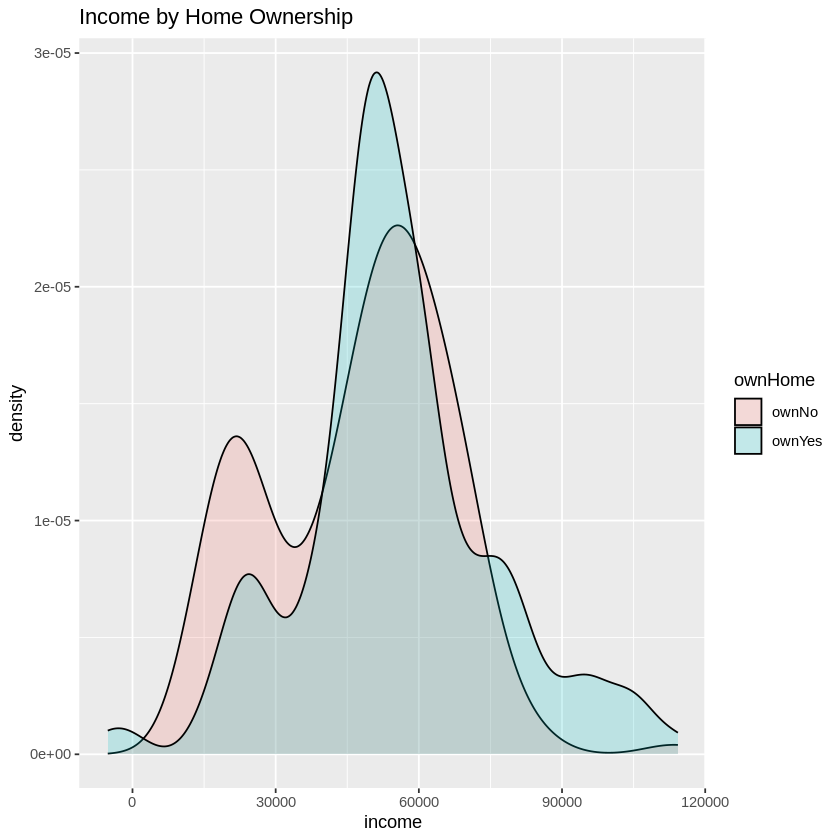

In [ ]:
ggplot(adf, aes(x = income, fill = ownHome)) + 
  geom_density(alpha = 0.2) +
  labs(title = 'Income by Home Ownership')

In [ ]:
t.test(income ~ ownHome, data = adf)

#### Logistic Model

Using other information to predict proportions aka binomial target.  Below, we create a logistic model to predict whether a customer will open the email.

The null hypothesis here is that past purchases do not effect whether someone opens the email.

In [ ]:
logistic_model <- glm(open ~ past_purch, 
                      data = email_data, 
                      family = "binomial")

In [ ]:
summary(logistic_model)


Call:
glm(formula = open ~ past_purch, family = "binomial", data = email_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.4075  -1.0346  -0.9926   1.2566   1.3742  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.516e-01  7.235e-03  -62.41   <2e-16 ***
past_purch   1.531e-03  2.542e-05   60.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 170951  on 123987  degrees of freedom
Residual deviance: 166391  on 123986  degrees of freedom
AIC: 166395

Number of Fisher Scoring iterations: 4


`geom_smooth()` using formula = 'y ~ x'


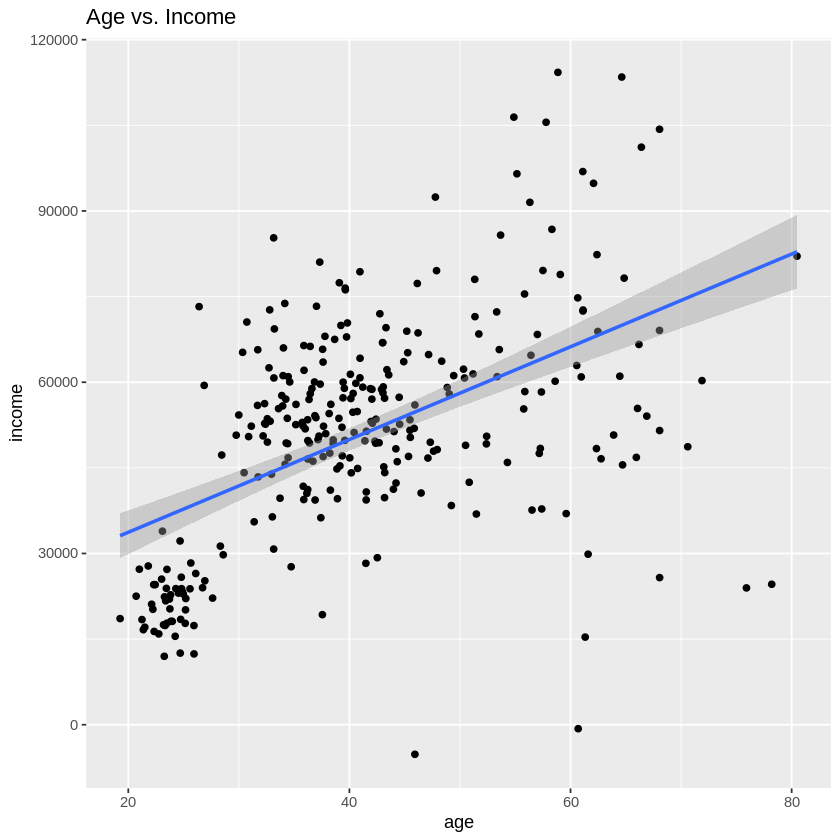

In [ ]:
g <- ggplot(adf, aes(x = age, y = income)) +
            geom_point() +
            geom_smooth(method = 'lm') +
            labs(title = 'Age vs. Income')
g

In [ ]:
regression_model <- lm(income ~ age, data = adf)

In [ ]:
summary(regression_model)


Call:
lm(formula = income ~ age, data = adf)

Residuals:
   Min     1Q Median     3Q    Max 
-67467 -11647    665  10043  48996 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17468.52    3397.87   5.141 4.96e-07 ***
age           812.34      78.82  10.306  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17320 on 298 degrees of freedom
Multiple R-squared:  0.2628,	Adjusted R-squared:  0.2603 
F-statistic: 106.2 on 1 and 298 DF,  p-value: < 2.2e-16


In [ ]:
confint(regression_model)

,2.5 %,97.5 %
(Intercept),10781.6661,24155.3783
age,657.2208,967.4539
